In [105]:
import os
import pandas as pd
import matplotlib.pyplot as plt

['Blazer', 'Blouse', 'Cardigan', 'Hoodie', 'Jacket', 'Sweater', 'Tank', 'Tee', 'Top', 'Jeans', 'Joggers', 'Leggings', 'Shorts', 'Skirt', 'Dress', 'Jumpsuit', 'Romper']
Number of images avaliable for train/val: 86361
Number of images avaliable in database: 189278


<AxesSubplot:title={'center':'Number of samples per category'}>

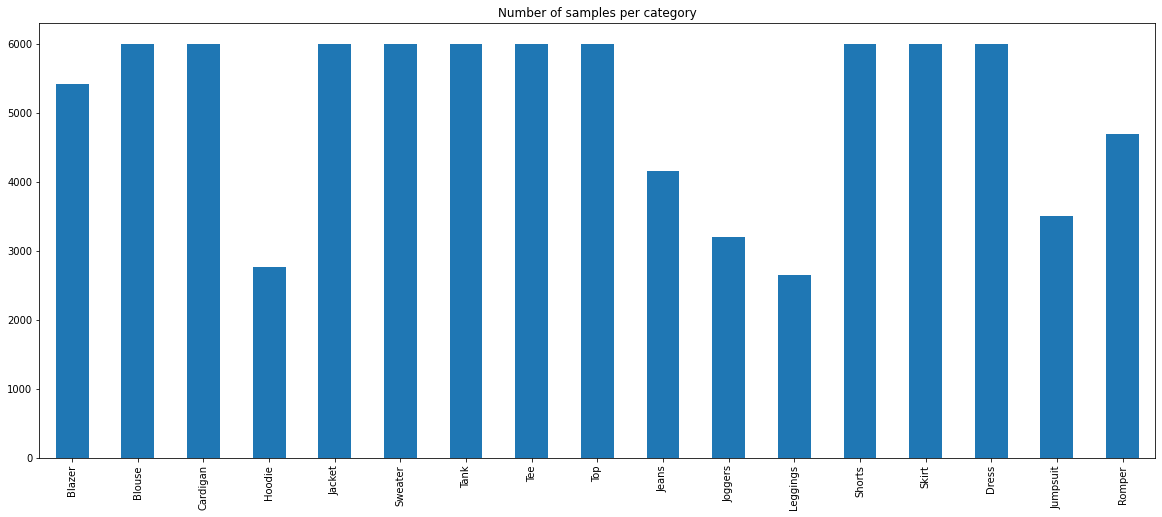

In [111]:
# load the label vs image data
path = "../dataset/anno/list_category_img.txt"
labels = pd.read_csv(path, sep='                        ', engine = 'python')

# _________________________________________________________________________________________________________________#
# load the label names

label_name = pd.read_csv('../dataset/anno/list_category_cloth.txt', sep='        ',engine='python')
label_list  = []
for x in label_name.index:
    if x[-1].isnumeric():
        label_list.append(x[:-1].strip())
    else:
        label_list.append(x)

# _________________________________________________________________________________________________________________#
# Take only those categories whose number of samples are greater than 2000, take max of 6000 samples

upp_bound = 6000
lower_bound = 2000

cats = labels.groupby(labels['category_label'])
train_data = pd.DataFrame(columns=labels.columns)
total_database = pd.DataFrame(columns=labels.columns)

for c in cats.groups:
    data = cats.get_group(c)
    if len(data) < lower_bound:
        continue
    elif len(data) > upp_bound:
        train_data = train_data.append(data.sample(n=upp_bound, random_state=42))
    else:
        train_data = train_data.append(data)
    total_database = total_database.append(data)


# _________________________________________________________________________________________________________________#
# create new labels and label_map

new_count = train_data['category_label'].value_counts().sort_index()
new_labels = []
i=0
for x in new_count.index:
    j = int(x)-1
    new_labels.append(label_list[j])
    train_data['category_label'].replace(x,i,inplace=True)
    total_database['category_label'].replace(x,i,inplace=True)
    i+=1
train_data['category_label'] = train_data['category_label'].astype(int)
total_database['category_label'] = total_database['category_label'].astype(int)

# _________________________________________________________________________________________________________________#
# show final stats

print(new_labels)
print("Number of images avaliable for train/val:",train_data.shape[0])
print("Number of images avaliable in database:",total_database.shape[0])


new_count = train_data['category_label'].value_counts().sort_index()
new_count.index = new_labels
plt.figure(figsize=(20,8))
plt.title('Number of samples per category')
new_count.plot(kind='bar')